# Librerías

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Importar datos

In [8]:
# Importamos los datos limpios desde la carpeta 'data':

memes = pd.read_csv('../data/clean_data/c_reddit_memes.csv')
programming = pd.read_csv('../data/clean_data/c_reddit_programming.csv')
science = pd.read_csv('../data/clean_data/c_reddit_science.csv')
relationships = pd.read_csv('../data/clean_data/c_reddit_relationships.csv')
usa = pd.read_csv('../data/clean_data/c_reddit_usa.csv')
canada = pd.read_csv('../data/clean_data/c_reddit_canada.csv')
uk = pd.read_csv('../data/clean_data/c_reddit_uk.csv')

# Datos de uso por país:

georeddit = pd.read_csv('../data/clean_data/c_georeddit.csv')

# Datos de Google Trends:

g_usa = pd.read_csv('../data/clean_data/c_google_usa.csv')
g_canada = pd.read_csv('../data/clean_data/c_google_canada.csv')
g_uk = pd.read_csv('../data/clean_data/c_google_uk.csv')

# Tabla conjunta:

activity = pd.read_csv('../data/clean_data/c_activity.csv')

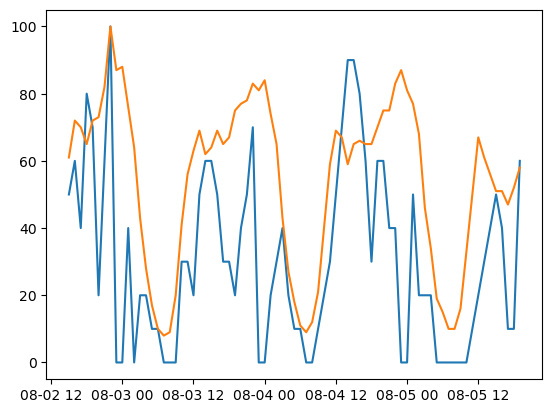

In [10]:
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.r_canada, label = 'r_usa')
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.g_canada, label = 'r_relationships')